# SHOPEASE CUSTOMER DATA ANALYSIS 

## LET'S WRITE A PYTHON CODE FOR DATA ANALYSIS & VISUALIZATION

In [607]:
class Customer:
    import time
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    report_keys = [
        'Customer Name', 'Customer Email', 'Age',
        'Age Group', 'Customer Lifecycle Category', 'Gender',
        'Total Purchases', 'Purchaser Category', 'Purchase Amount',
        'Purchase Value Category', 'Average Purchase Amount',
        'Average Purchase Value Category', 'Customer Since',
        'Membership Duration', 'Membership Category'
    ]

    @classmethod
    def load_data(cls, file_path='SHOPEASE CUSTOMER INSIGHTS DATASET - POWERBI MODIFIED.xlsx'):
        cls.df = cls.pd.read_excel(file_path)
        cls.df.sort_values(by='Customer ID', ascending=True, inplace=True)
        cls.df.set_index('Customer ID', inplace=True)
        print('DataFrame Initialised, you can run the processes now...\n')

    @staticmethod
    def timing_decorator(func):
        def wrapper(self, *args, **kwargs):
            start_time = Customer.time.time()
            result = func(self, *args, **kwargs)
            end_time = Customer.time.time()
            execution_time = end_time - start_time
            self.execution_time = execution_time
            print('\nGetting data...')
            print(f"\nOperation Execution Time: {execution_time:.2f} seconds")
            if execution_time < 0.01:
                print("System Performance: Optimum\n")
            elif execution_time < 0.05:
                print("System Performance: Good\n")
            elif execution_time < 0.10:
                print("System Performance: Average\n")
            else:
                print("System Performance: Poor\n")
            return result
        return wrapper

    def __init__(self, customer_id=None):
        self.customer_id = customer_id
        self.customer_name = None
        self.gender = None
        self.age = None
        self.total_purchases = None
        self.avg_purchase_amount = None
        self.membership_duration = None
        self.purchaser_category = None
        self.membership_category = None
        self.purchase_value_category = None
        self.avg_purchase_value_category = None
        self.execution_time = None

        if customer_id:
            self._retrieve_data()

    def _retrieve_data(self):
        if self.customer_id in Customer.df.index:
            customer_data = Customer.df.loc[self.customer_id]
            self.customer_name = customer_data.get('Customer Name', "Unknown")
            self.gender = customer_data.get('Gender', "Unknown")
            self.age = customer_data.get('Age', "Unknown")
            self.total_purchases = customer_data.get('Total Purchases', 0)
            self.avg_purchase_amount = customer_data.get('Average Purchase Amount', 0)
            self.membership_duration = customer_data.get('Membership Duration', 0)
            self.purchaser_category = customer_data.get('Purchaser Category', "Unknown")
            self.membership_category = customer_data.get('Membership Category', "Unknown")
            self.purchase_value_category = customer_data.get('Purchase Value Category', "Unknown")
            self.avg_purchase_value_category = customer_data.get('Average Purchase Value Category', "Unknown")
        else:
            self.customer_name = "Unknown"

    @timing_decorator
    def calculate_clv(self):
        if self.membership_duration and self.membership_duration > 0:
            purchase_frequency = self.total_purchases / self.membership_duration
        else:
            purchase_frequency = 0
        clv = self.avg_purchase_amount * purchase_frequency * self.membership_duration if self.membership_duration else 0

        if clv >= 10000:
            segment = "High-Value"
        elif 5000 <= clv < 10000:
            segment = "Mid-Value"
        else:
            segment = "Low-Value"
        return clv, segment

    def display_customer_clv_info(self):
        while True:
            target_customer_id = input("\nPlease enter a Customer ID to generate the CUSTOMER INSIGHTS REPORT:")
            self.__init__(target_customer_id)
        
            if self.customer_name == "Unknown":
                print(f"\nAlert: No data found for the Customer ID {self.customer_id}. Please enter a valid Customer ID.")
                continue
            else:
                clv, segment = self.calculate_clv()
                print("------------------------------------------------------------")
                print(f"CUSTOMER INSIGHTS REPORT\n")
                print(f"Customer ID: {self.customer_id}\n")
                print(f"•Personal Details")
                print(f" →Name: {self.customer_name}")
                print(f" →Gender: {self.gender}")
                print(f" →Age: {self.age}\n")
                print(f"•Purchaser Details")
                print(f" →Purchaser Category: {self.purchaser_category}")
                print(f" →Membership Category: {self.membership_category}")
                print(f" →Purchase Value Category: {self.purchase_value_category}")
                print(f" →Average Purchase Value Category: {self.avg_purchase_value_category}\n")
                print(f"•Lifetime Value Details")
                print(f" →Customer CLV: ${clv:.2f}")
                print(f" →Customer Segment: {segment}")
                print("------------------------------------------------------------")
            user_input = input("\nWould you like to generate a CUSTOMER INSIGHTS REPORT for another Customer ID? Enter 'y' to proceed or any other key to exit:")
            if user_input.lower() != 'y':
                print("\nSee you again, goodbye!")
                break

    @staticmethod
    def customer_details_generator(target_customer_id):
        if target_customer_id in Customer.df.index:
            row = Customer.df.loc[target_customer_id]
            details = row.to_dict()
            filtered_details = {key: details.get(key, 'N/A') for key in Customer.report_keys}
            yield filtered_details
        else:
            yield None

    def generate_customer_details(self):       
        while True:
            target_customer_id = input("\nPlease enter the Customer ID:")
            print('\nGetting data...\n')
            customer_generator = Customer.customer_details_generator(target_customer_id)
            report = next(customer_generator)
            if report:
                print(f"CUSTOMER DETAILS REPORT\n")
                print(f"Customer ID: {target_customer_id}\n")
                print(f"{'Attribute':<35} {'Value':<30}")
                print("-" * 60)
                for key, value in report.items():
                    print(f"{key:<35} {value:<30}")
                print("------------------------------------------------------------")
            else:
                print(f"No data found for the Customer ID {target_customer_id}. Please enter a valid Customer ID.")
                continue
            user_input = input("\nWould you like to generate a report for another Customer ID? Enter 'y' to proceed or any other key to exit: ")
            if user_input.lower() != 'y':
                print("\nSee you again, goodbye!")
                break

    def demographic_analysis(self):
        print("\nCUSTOMER DEMOGRAPHICS ANALYSIS")
        print("------------------------------")
        self.plot_gender_distribution()
        self.plot_age_distribution()
        self.plot_lifecycle_category_breakdown()

    def plot_gender_distribution(self):
        print("\n•Customer Gender Distribution\n")
        selected_gender = 'All'
        if selected_gender != 'All':
            filtered_df = Customer.df[Customer.df['Gender'] == selected_gender]
        else:
            filtered_df = Customer.df
        gender_counts = filtered_df['Gender'].value_counts()
        plt.figure(figsize=(8, 4))
        wedges, texts, autotexts = plt.pie(
            gender_counts, 
            labels=gender_counts.index, 
            autopct=lambda p: f'{p:.2f}%',
            colors=['#F7B7A3', '#9B3192'],
            startangle=140, 
            wedgeprops=dict(edgecolor='w')
        )
        plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, transform=plt.gca().transAxes, color='#DDDDDD', fill=False, linewidth=2))
        plt.title('Customer Gender Distribution', fontsize=14, weight='bold', color='#800020')
        plt.show()
        
    def plot_age_distribution(self):
        print("\n•Customer Age Distribution\n")
        age_range = (Customer.df['Age'].min(), Customer.df['Age'].max())
        filtered_df = Customer.df[(Customer.df['Age'] >= age_range[0]) & (Customer.df['Age'] <= age_range[1])]    
        
        plt.figure(figsize=(8, 4))
        sns.histplot(filtered_df['Age'], kde=False, color='#F7B7A3', bins=15, edgecolor='#9B3192')
        plt.title(f'Customer Age Distribution', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Age', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Frequency', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.show()
    
    def plot_lifecycle_category_breakdown(self):
        print("\n•Customer Lifecycle Category Breakdown\n")
        if 'Customer Lifecycle Category' not in Customer.df.columns:
            raise ValueError("Column 'Customer Lifecycle Category' not found in DataFrame.")
        lifecycle_counts = Customer.df['Customer Lifecycle Category'].value_counts()    
        plt.figure(figsize=(8, 4))
        plt.fill_between(lifecycle_counts.index, lifecycle_counts, color='#F7B7A3', edgecolor='#9B3192')
        plt.title('Customers by Lifecycle Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customer Lifecycle Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.show()

    def purchase_behavior_analysis(self):
        print("\nCUSTOMER PURCHASE BEHAVIOR ANALYSIS")
        print("----------------------------------------")
        self.plot_total_purchases_distribution()
        self.plot_purchaser_category_distribution()
        self.plot_purchase_amount_distribution()
        self.plot_purchase_value_category_analysis()
        self.plot_avg_purchase_value_category_analysis()
    
    def plot_total_purchases_distribution(self):
        print("\n•Purchase Analysis\n")
        purchase_counts = Customer.df['Total Purchases'].value_counts().sort_index()
        plt.figure(figsize=(8, 4))
        plt.scatter(
            purchase_counts.index, 
            purchase_counts.values, 
            color='#F7B7A3',
            s=100, 
            edgecolor='#9B3192',
            alpha=0.7
        )
        plt.title('Customer by Total Purchases', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Total Purchases', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.grid(False)
        plt.show()
    
    def plot_purchaser_category_distribution(self):
        print("\n•Customer Purchaser Category Distribution\n")
        purchaser_counts = Customer.df['Purchaser Category'].value_counts().sort_index()
        ecdf = purchaser_counts.cumsum() / purchaser_counts.sum()
        plt.figure(figsize=(8, 4))
        plt.step(
            ecdf.index, 
            ecdf, 
            where='post', 
            color='#F7B7A3'
        )
        plt.title('Customer Purchaser Category Distribution', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Purchaser Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Cumulative Customer Percentage', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.grid(False)
        plt.xticks(rotation=0)
        plt.show()
    
    def plot_purchase_amount_distribution(self):
        print("\n•Total Purchase Amount Distribution\n")
        plt.figure(figsize=(8, 4))
        sns.kdeplot(
            Customer.df['Purchase Amount'], 
            fill=True, 
            color='#F7B7A3'
        )
        plt.title('Purchase Amount Distribution', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Purchase Amount', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customer Density', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.grid(False)
        plt.show()
    
    def plot_purchase_value_category_analysis(self):
        print("\n•Purchase Value Category Analysis\n")
        category_counts = Customer.df.groupby('Purchase Value Category').size()
        plt.figure(figsize=(8, 4))
        category_counts.sort_index().plot(
            kind='barh', 
            color='#F7B7A3',
            edgecolor='#9B3192'
        )
        plt.title('Customers by Purchase Value Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Purchase Value Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.show()
    
    def plot_avg_purchase_value_category_analysis(self):
        print("\n•Average Purchase Value Category Analysis\n")
        category_counts = Customer.df['Average Purchase Value Category'].value_counts()
        plt.figure(figsize=(8, 4))
        plt.bar(
            category_counts.index, 
            category_counts.values, 
            color='#F7B7A3',
            edgecolor='#9B3192'
        )
        plt.title('Customers by Average Purchase Value Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Average Purchase Value Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.xticks(rotation=0)
        plt.show()
       
    def correlations_relationships_analysis(self):
        print("\nCORRELATION & RELATIONSHIP ANALYSIS")
        print("----------------------------------------")
        self.plot_correlation_matrix()
        self.plot_gender_vs_purchaser_category()
        self.plot_age_group_vs_purchaser_category()
        self.plot_purchase_amount_by_age_group()

    def plot_correlation_matrix(self):
        print("\n•Correlation Matrix\n")
        numerical_cols = ['Age', 'Total Purchases', 'Purchase Amount', 
                           'Average Purchase Amount', 'Membership Duration']
        corr_matrix = Customer.df[numerical_cols].corr()
        plt.figure(figsize=(8, 4))
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            cbar_kws={'shrink': .5}
        )
        plt.title('Correlation Matrix', fontsize=14, weight='bold', color='#800020')
        plt.show()
        
    def plot_gender_vs_purchaser_category(self):
        print("\n•Gender vs Purchaser Category\n")
        plt.figure(figsize=(8, 4))
        sns.countplot(
            data=Customer.df, 
            x='Purchaser Category', 
            hue='Gender', 
            palette=['#F7B7A3', '#9B3192']
        )
        plt.title('Gender vs Purchaser Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Purchaser Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Number of Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.xticks(rotation=45)
        plt.legend(title='Gender', title_fontsize='13', fontsize='11')
        plt.show()
    
    def plot_age_group_vs_purchaser_category(self):
        print("\n•Age Group vs Purchaser Category\n")
        age_purchaser_crosstab = pd.crosstab(Customer.df['Age Group'], Customer.df['Purchaser Category'])
        plt.figure(figsize=(8, 4))
        
        sns.heatmap(
            age_purchaser_crosstab, 
            annot=True, 
            cmap='coolwarm',
            fmt='d',
            cbar_kws={'shrink': .5}
        )
        plt.title('Age Group vs Purchaser Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Purchaser Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Age Group', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.show()
      
    def plot_purchase_amount_by_age_group(self):
        print("\n•Purchase Amount by Age Group\n")
        plt.figure(figsize=(8, 4))
        sns.boxplot(
            x='Age Group', 
            y='Purchase Amount', 
            data=Customer.df,
            boxprops=dict(facecolor='#F7B7A3', edgecolor='#9B3192'),
            medianprops=dict(color='#9B3192'),
            whiskerprops=dict(color='#9B3192'),
            capprops=dict(color='#9B3192'),
            flierprops=dict(markerfacecolor='#F7B7A3', markeredgecolor='#9B3192')
        )
        plt.title('Purchase Amount by Age Group', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Age Group', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Purchase Amount', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.xticks(rotation=0)
        plt.show()
    
    def loyalty_analyis(self):
        print("\nCUSTOMER LOYALTY ANALYSIS")
        print("----------------------------------------")
        self.plot_membership_duration()
        self.plot_membership_category_distribution()
        self.plot_membership_duration_vs_total_purchases()

    def plot_membership_duration(self):
        print("\n•Membership Duration Analysis\n")
        selected_duration = self.df['Membership Duration'].min()
        filtered_df = self.df[self.df['Membership Duration'] >= selected_duration]
        plt.figure(figsize=(8, 4))
        sns.boxplot(
            x=filtered_df['Membership Duration'], 
            color='#F7B7A3',  # Soft peach
            boxprops=dict(facecolor='#F7B7A3', edgecolor='#9B3192'),
            medianprops=dict(color='#9B3192'),
            whiskerprops=dict(color='#9B3192'),
            capprops=dict(color='#9B3192'),
            flierprops=dict(markerfacecolor='#F7B7A3', markeredgecolor='#9B3192')
        )
        plt.title(f'Customers by Membership Duration', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Membership Duration (Years)', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.xticks(rotation=0)
        plt.show()

    def plot_membership_category_distribution(self):
        print("\n•Membership Category Distribution\n")
        membership_counts = Customer.df['Membership Category'].value_counts().reset_index()
        membership_counts.columns = ['Membership Category', 'Number of Customers']    
        plt.figure(figsize=(8, 4))
        sns.barplot(x='Membership Category', y='Number of Customers', data=membership_counts, color='#F7B7A3', edgecolor='#9B3192')
        plt.title('Customers by Membership Category', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Membership Category', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Customers', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.xticks(rotation=0)
        plt.show()

    def plot_membership_duration_vs_total_purchases(self):
        print("\n•Membership Duration vs Total Purchases\n")
        plt.figure(figsize=(8, 4))
        sns.violinplot(
            x='Membership Duration', 
            y='Total Purchases', 
            data=Customer.df,
            color='#F7B7A3',
            edgecolor='#9B3192'
        )
        plt.title('Membership Duration vs Total Purchases', fontsize=14, weight='bold', color='#800020')
        plt.xlabel('Membership Duration (Years)', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.ylabel('Total Purchases', fontsize=11, color='#3C3C3C', fontweight='bold')
        plt.grid(True)
        plt.show()

## LET'S GET STARTED WITH THE PROCESS OF DATA ANALYSIS AND VISUALIZATION

##### Creating an instance of the Customer class for data initialization

In [609]:
customer_data_initialization = Customer()

In [611]:
customer_data_initialization.load_data() 

DataFrame Initialised, you can run the processes now...



### CUSTOMER DATA ANALYSIS

##### Creating an instance of the Customer class for data analysis

In [613]:
customer_data_analysis = Customer()

#### *Customer CLV Report Generation*

In [615]:
customer_data_analysis.display_customer_clv_info()


Please enter a Customer ID to generate the CUSTOMER INSIGHTS REPORT: CID0232



Getting data...

Operation Execution Time: 0.00 seconds
System Performance: Optimum

------------------------------------------------------------
CUSTOMER INSIGHTS REPORT

Customer ID: CID0232

•Personal Details
 →Name: Gabriel Lewisfield
 →Gender: Female
 →Age: 21

•Purchaser Details
 →Purchaser Category: High
 →Membership Category: Silver
 →Purchase Value Category: Low
 →Average Purchase Value Category: Low

•Lifetime Value Details
 →Customer CLV: $748.68
 →Customer Segment: Low-Value
------------------------------------------------------------



Would you like to generate a CUSTOMER INSIGHTS REPORT for another Customer ID? Enter 'y' to proceed or any other key to exit: y

Please enter a Customer ID to generate the CUSTOMER INSIGHTS REPORT: CID2301



Alert: No data found for the Customer ID CID2301. Please enter a valid Customer ID.



Please enter a Customer ID to generate the CUSTOMER INSIGHTS REPORT: CID0342



Getting data...

Operation Execution Time: 0.00 seconds
System Performance: Optimum

------------------------------------------------------------
CUSTOMER INSIGHTS REPORT

Customer ID: CID0342

•Personal Details
 →Name: Joshua Brown
 →Gender: Male
 →Age: 59

•Purchaser Details
 →Purchaser Category: Moderate
 →Membership Category: Silver
 →Purchase Value Category: High
 →Average Purchase Value Category: Moderate

•Lifetime Value Details
 →Customer CLV: $7571.81
 →Customer Segment: Mid-Value
------------------------------------------------------------



Would you like to generate a CUSTOMER INSIGHTS REPORT for another Customer ID? Enter 'y' to proceed or any other key to exit: n



See you again, goodbye!


 #### *Customer Details Report Generation*

In [617]:
customer_data_analysis.generate_customer_details()


Please enter the Customer ID: CID0232



Getting data...

CUSTOMER DETAILS REPORT

Customer ID: CID0232

Attribute                           Value                         
------------------------------------------------------------
Customer Name                       Gabriel Lewisfield            
Customer Email                      gabriel.lewisfield@gmail.com  
Age                                 21                            
Age Group                           18 to 25                      
Customer Lifecycle Category         Gen Z                         
Gender                              Female                        
Total Purchases                     90                            
Purchaser Category                  High                          
Purchase Amount                     748.68                        
Purchase Value Category             Low                           
Average Purchase Amount             8.3187                        
Average Purchase Value Category     Low                           
Cus


Would you like to generate a report for another Customer ID? Enter 'y' to proceed or any other key to exit:  y

Please enter the Customer ID: CID0909



Getting data...

No data found for the Customer ID CID0909. Please enter a valid Customer ID.



Please enter the Customer ID: CID0342



Getting data...

CUSTOMER DETAILS REPORT

Customer ID: CID0342

Attribute                           Value                         
------------------------------------------------------------
Customer Name                       Joshua Brown                  
Customer Email                      joshua.brown@yahoo.com        
Age                                 59                            
Age Group                           56 to 65                      
Customer Lifecycle Category         Boomers                       
Gender                              Male                          
Total Purchases                     49                            
Purchaser Category                  Moderate                      
Purchase Amount                     7571.81                       
Purchase Value Category             High                          
Average Purchase Amount             154.5267                      
Average Purchase Value Category     Moderate                      
Cus


Would you like to generate a report for another Customer ID? Enter 'y' to proceed or any other key to exit:  n



See you again, goodbye!


### CUSTOMER DATA VISUALIZATION

##### Creating an instance of the Customer class for data visualization

In [597]:
customer_data_visualization = Customer()

#### *Customer Demographic Analysis*


CUSTOMER DEMOGRAPHICS ANALYSIS
------------------------------


•Customer Gender Distribution



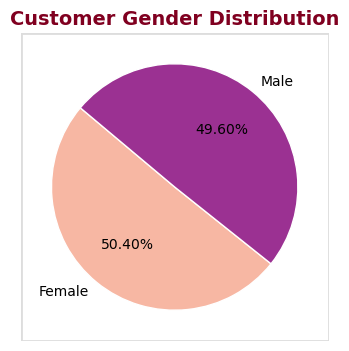


•Customer Age Distribution



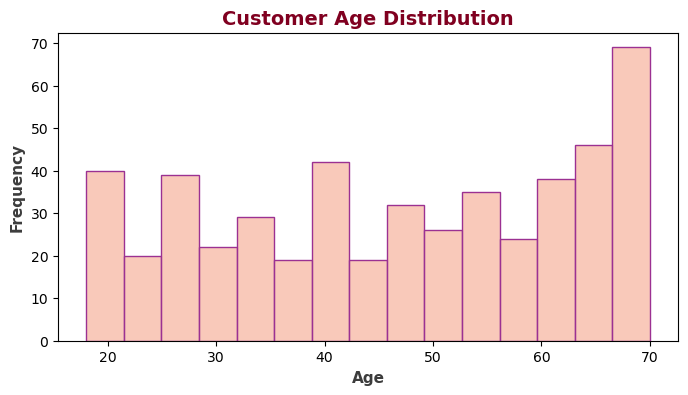


•Customer Lifecycle Category Breakdown



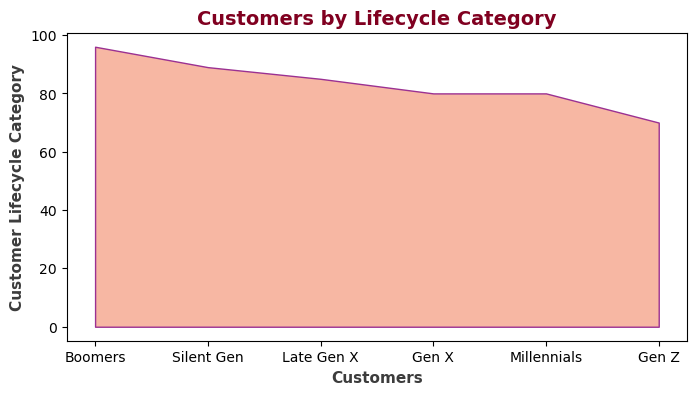

In [619]:
customer_data_visualization.demographic_analysis()

#### *Customer Purchase Behavior Analysis*


CUSTOMER PURCHASE BEHAVIOR ANALYSIS
----------------------------------------


•Purchase Analysis



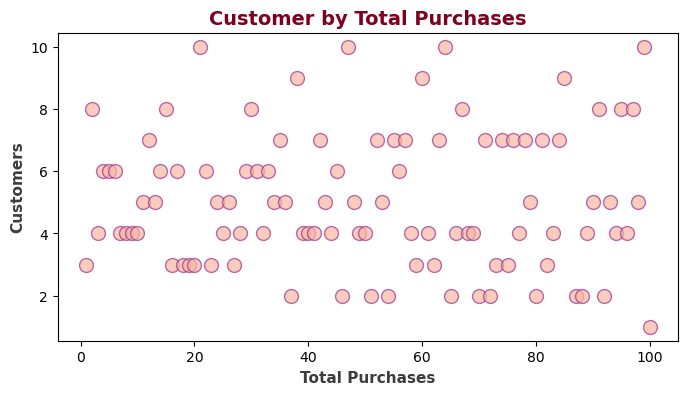


•Customer Purchaser Category Distribution



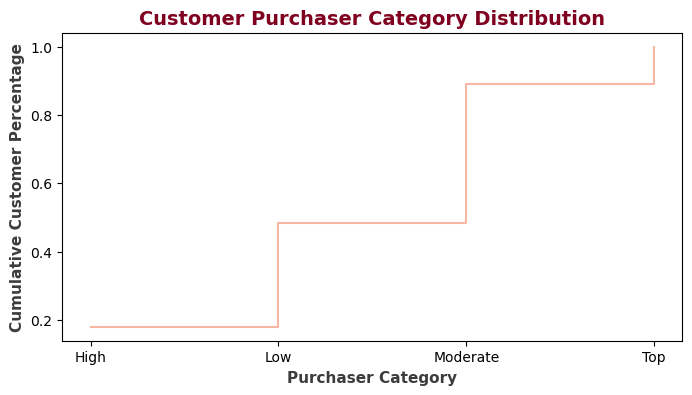


•Total Purchase Amount Distribution



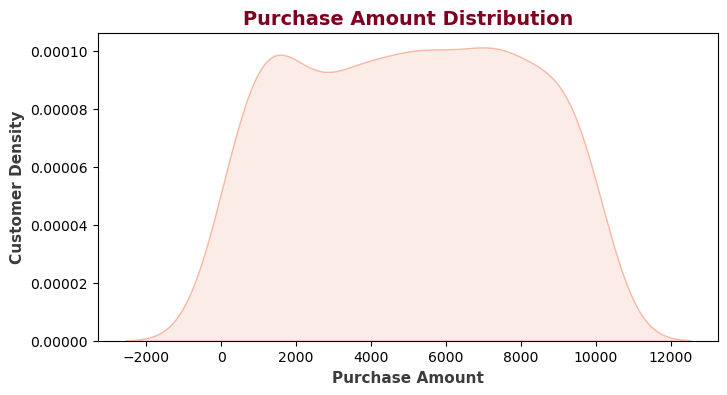


•Purchase Value Category Analysis



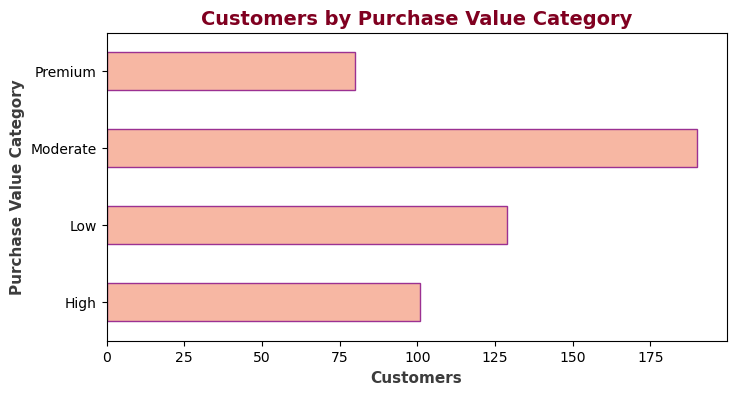


•Average Purchase Value Category Analysis



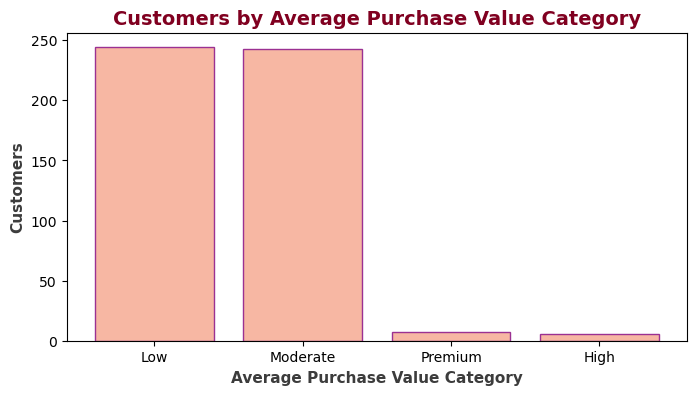

In [621]:
customer_data_visualization.purchase_behavior_analysis()

#### *Correlation & Relationship Analysis*


CORRELATION & RELATIONSHIP ANALYSIS
----------------------------------------


•Correlation Matrix



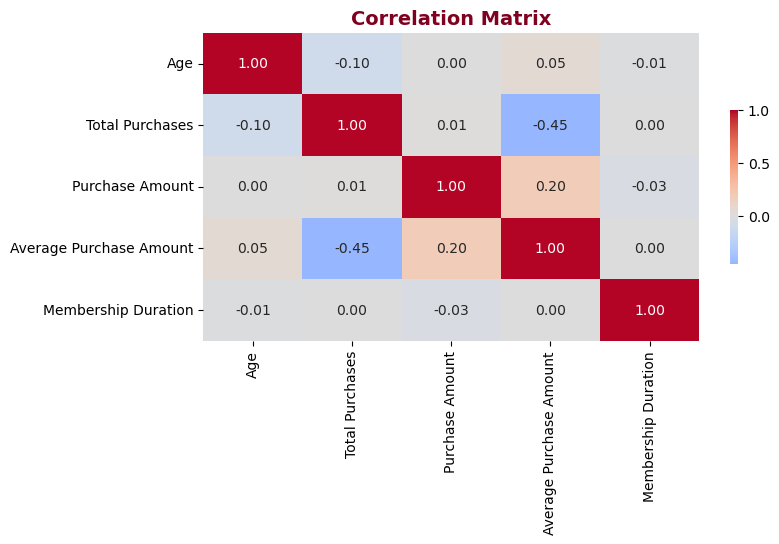


•Gender vs Purchaser Category



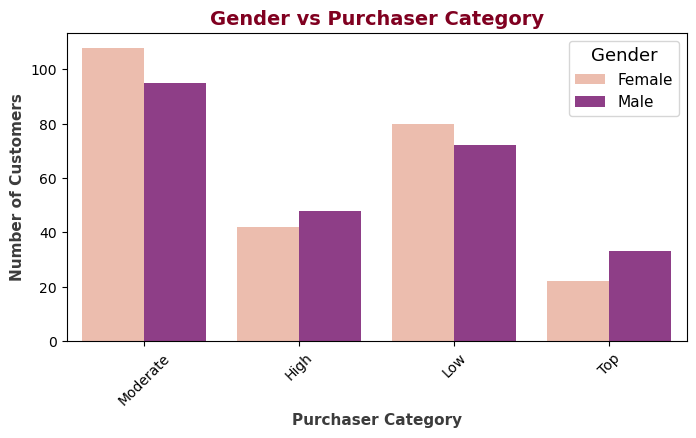


•Age Group vs Purchaser Category



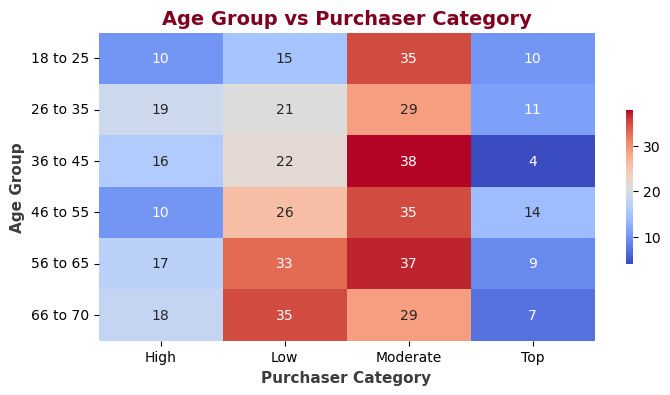


•Purchase Amount by Age Group



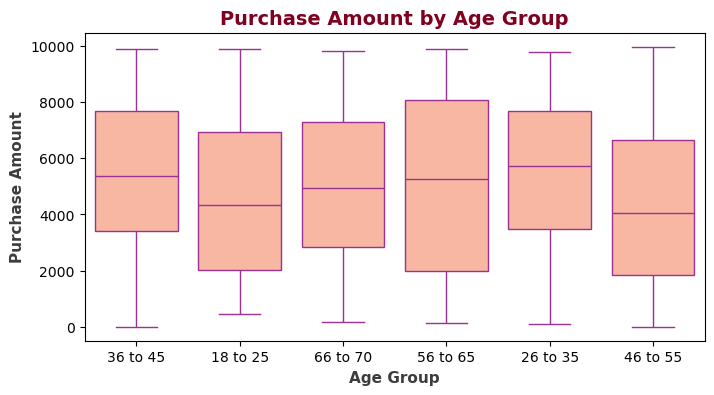

In [603]:
customer_data_visualization.correlations_relationships_analysis()

#### *Customer Loyalty Analysis*


CUSTOMER LOYALTY ANALYSIS
----------------------------------------


•Membership Duration Analysis



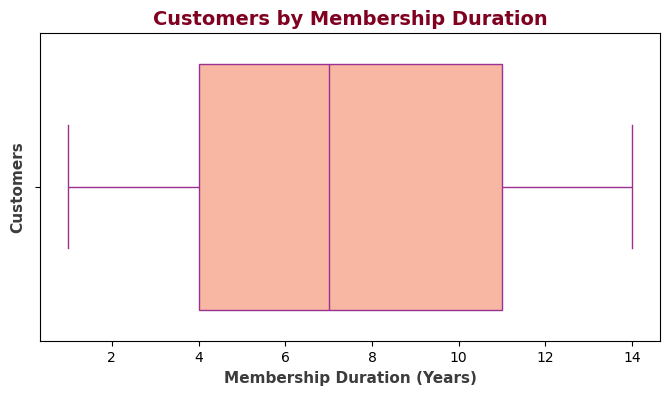


•Membership Category Distribution



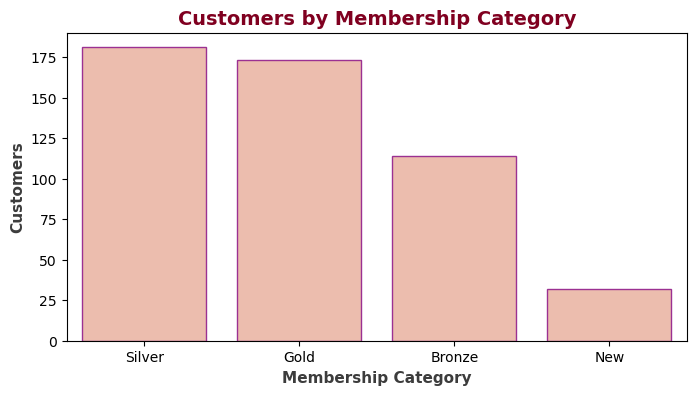


•Membership Duration vs Total Purchases



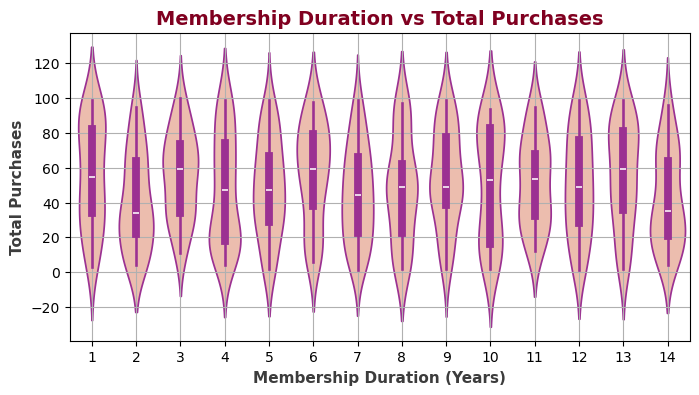

In [623]:
customer_data_visualization.loyalty_analyis()

## *That is it for now, so see you again...*